PROJECT OBJECTIVE: Design an ML-based algorithm for predicting the cost of the media in acquiring customers.

In this challenge, you’re required to build an ML model to predict the media cost based on the customer’s details, product details, promotion details, and store details.

Load the required libraries and read the database.

In [3]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import metrics 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from matplotlib.font_manager import FontProperties
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor








In [4]:
df_foodmart = pd.read_csv("C:\\Users\\ANKITA SHARMA\\Desktop\\capstone\\Train.csv")


Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [5]:
df_foodmart.shape

(36256, 41)

In [6]:
df_foodmart.head(5)

,row_id,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,1,Bathroom Products,Health and Hygiene,Non-Consumable,4.35,1.3485,3,Double Down Sale,Canada,M,...,16418,4016,2678,1,1,1,1,1,Cash Register Handout,142.71
1,2,Fruit,Produce,Food,5.58,1.8414,3,Shelf Clearing Days,USA,S,...,13305,4746,3164,1,0,0,0,0,Radio,99.77
2,3,Beer and Wine,Alcoholic Beverages,Drink,5.10,2.1420,3,Two Day Sale,Mexico,S,...,20141,6393,4262,1,1,1,1,1,Product Attachment,76.88
3,4,Fruit,Canned Products,Food,4.20,2.0580,3,Cash Register Lottery,USA,S,...,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio, TV",55.59
4,5,Paper Products,Household,Non-Consumable,10.35,3.5190,3,One Day Sale,Mexico,S,...,30351,4819,3213,0,0,0,0,0,Street Handout,146.72


In [7]:
df_foodmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36256 entries, 0 to 36255
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   row_id                      36256 non-null  int64  
 1   food_category               36256 non-null  object 
 2   food_department             36256 non-null  object 
 3   food_family                 36256 non-null  object 
 4   store_sales(in millions)    36256 non-null  float64
 5   store_cost(in millions)     36256 non-null  float64
 6   unit_sales(in millions)     36256 non-null  int64  
 7   promotion_name              36256 non-null  object 
 8   sales_country               36256 non-null  object 
 9   marital_status              36256 non-null  object 
 10  gender                      36256 non-null  object 
 11  total_children              36256 non-null  int64  
 12  education                   36256 non-null  object 
 13  member_card                 362

In [8]:
df_foodmart.drop('row_id', inplace=True,axis=1)
df_foodmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36256 entries, 0 to 36255
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               36256 non-null  object 
 1   food_department             36256 non-null  object 
 2   food_family                 36256 non-null  object 
 3   store_sales(in millions)    36256 non-null  float64
 4   store_cost(in millions)     36256 non-null  float64
 5   unit_sales(in millions)     36256 non-null  int64  
 6   promotion_name              36256 non-null  object 
 7   sales_country               36256 non-null  object 
 8   marital_status              36256 non-null  object 
 9   gender                      36256 non-null  object 
 10  total_children              36256 non-null  int64  
 11  education                   36256 non-null  object 
 12  member_card                 36256 non-null  object 
 13  occupation                  362

Check if there are any duplicate records in the dataset? 

In [9]:
duplicate_rows = df_foodmart[df_foodmart.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (0, 40)


no duplicate values in dataset.

Check for missing values in each column of the dataset?

In [10]:
def check_missing_values(df_foodmart):
    '''Function to check the missing data percentage'''
    print("percentage of missing data of dataframe \n",df_foodmart.isnull().sum()/len(df_foodmart)*100)

check_missing_values(df_foodmart)

percentage of missing data of dataframe 
 food_category                 0.0
food_department               0.0
food_family                   0.0
store_sales(in millions)      0.0
store_cost(in millions)       0.0
unit_sales(in millions)       0.0
promotion_name                0.0
sales_country                 0.0
marital_status                0.0
gender                        0.0
total_children                0.0
education                     0.0
member_card                   0.0
occupation                    0.0
houseowner                    0.0
avg_cars_at home(approx)      0.0
avg. yearly_income            0.0
num_children_at_home          0.0
avg_cars_at home(approx).1    0.0
brand_name                    0.0
SRP                           0.0
gross_weight                  0.0
net_weight                    0.0
recyclable_package            0.0
low_fat                       0.0
units_per_case                0.0
store_type                    0.0
store_city                    0.0
store_

no missing values in dataset.

Check the statistical summary for the numerical and categorical columns and write your findings.

In [11]:
df_foodmart.describe().T

,count,mean,std,min,25%,50%,75%,max
store_sales(in millions),36256.0,6.549142,3.466700,0.5200,3.80,5.9400,8.6700,22.9200
store_cost(in millions),36256.0,2.620838,1.453903,0.1792,1.50,2.3856,3.4854,9.7265
unit_sales(in millions),36256.0,3.093143,0.828942,1.0000,3.00,3.0000,4.0000,6.0000
total_children,36256.0,2.545068,1.487449,0.0000,1.00,3.0000,4.0000,5.0000
avg_cars_at home(approx),36256.0,2.197705,1.110560,0.0000,1.00,2.0000,3.0000,4.0000
num_children_at_home,36256.0,0.836496,1.308415,0.0000,0.00,0.0000,1.0000,5.0000
avg_cars_at home(approx).1,36256.0,2.197705,1.110560,0.0000,1.00,2.0000,3.0000,4.0000
SRP,36256.0,2.118466,0.932304,0.5000,1.42,2.1300,2.7900,3.9800
gross_weight,36256.0,13.782083,4.614967,6.0000,9.70,13.6000,17.7000,21.9000
net_weight,36256.0,11.773494,4.673230,3.0500,7.71,11.5000,15.8000,20.8000


In [12]:
#catrgorial summary
df_foodmart.describe(include=object).transpose()

,count,unique,top,freq
food_category,36256,45,Vegetables,4432
food_department,36256,22,Produce,5129
food_family,36256,3,Food,25909
promotion_name,36256,49,Weekend Markdown,1398
sales_country,36256,3,USA,23338
marital_status,36256,2,S,18137
gender,36256,2,F,18551
education,36256,5,Partial High School,10924
member_card,36256,4,Bronze,20260
occupation,36256,5,Professional,11967


Categorical features:

In [13]:
df_foodmart.columns[df_foodmart.dtypes=='object']

Index(['food_category', 'food_department', 'food_family', 'promotion_name',
       'sales_country', 'marital_status', 'gender', 'education', 'member_card',
       'occupation', 'houseowner', 'avg. yearly_income', 'brand_name',
       'store_type', 'store_city', 'store_state', 'media_type'],
      dtype='object')

In [14]:
df_foodmart["food_category"].value_counts()

Vegetables              4432
Snack Foods             4131
Dairy                   2307
Fruit                   1883
Meat                    1833
Jams and Jellies        1553
Breakfast Foods         1199
Baking Goods            1167
Bread                   1056
Canned Soup             1004
Paper Products           986
Beer and Wine            947
Candy                    915
Bathroom Products        915
Electrical               908
Frozen Desserts          854
Specialty                704
Starchy Foods            667
Magazines                598
Eggs                     566
Kitchen Products         564
Hot Beverages            555
Pain Relievers           514
Hygiene                  493
Pizza                    490
Cleaning Supplies        456
Carbonated Beverages     452
Pure Juice Beverages     452
Side Dishes              370
Frozen Entrees           366
Drinks                   357
Plastic Products         349
Hardware                 345
Cold Remedies            240
Decongestants 

In [15]:
df_foodmart["food_family"].value_counts()

Food              25909
Non-Consumable     6996
Drink              3351
Name: food_family, dtype: int64

Perform the data visualization on the dataset to gain some basic insights about the dataset.

<AxesSubplot: xlabel='cost', ylabel='count'>

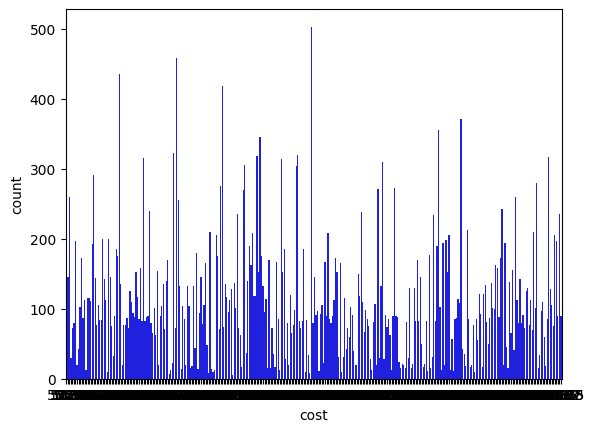

In [16]:
#count plot for cost
sns.countplot(x = 'cost',data = df_foodmart, color = 'blue')

<AxesSubplot: xlabel='cost', ylabel='Density'>

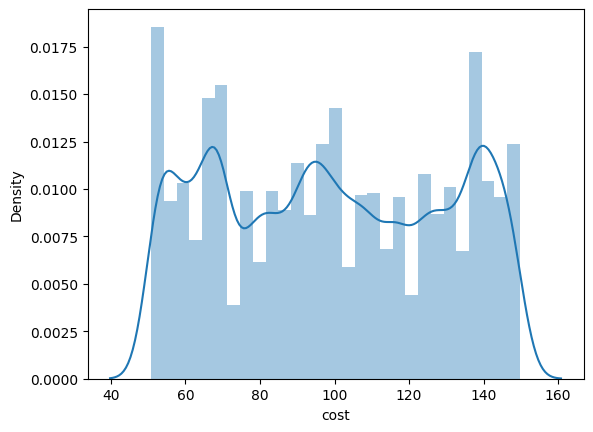

In [17]:
sns.distplot(df_foodmart['cost'])

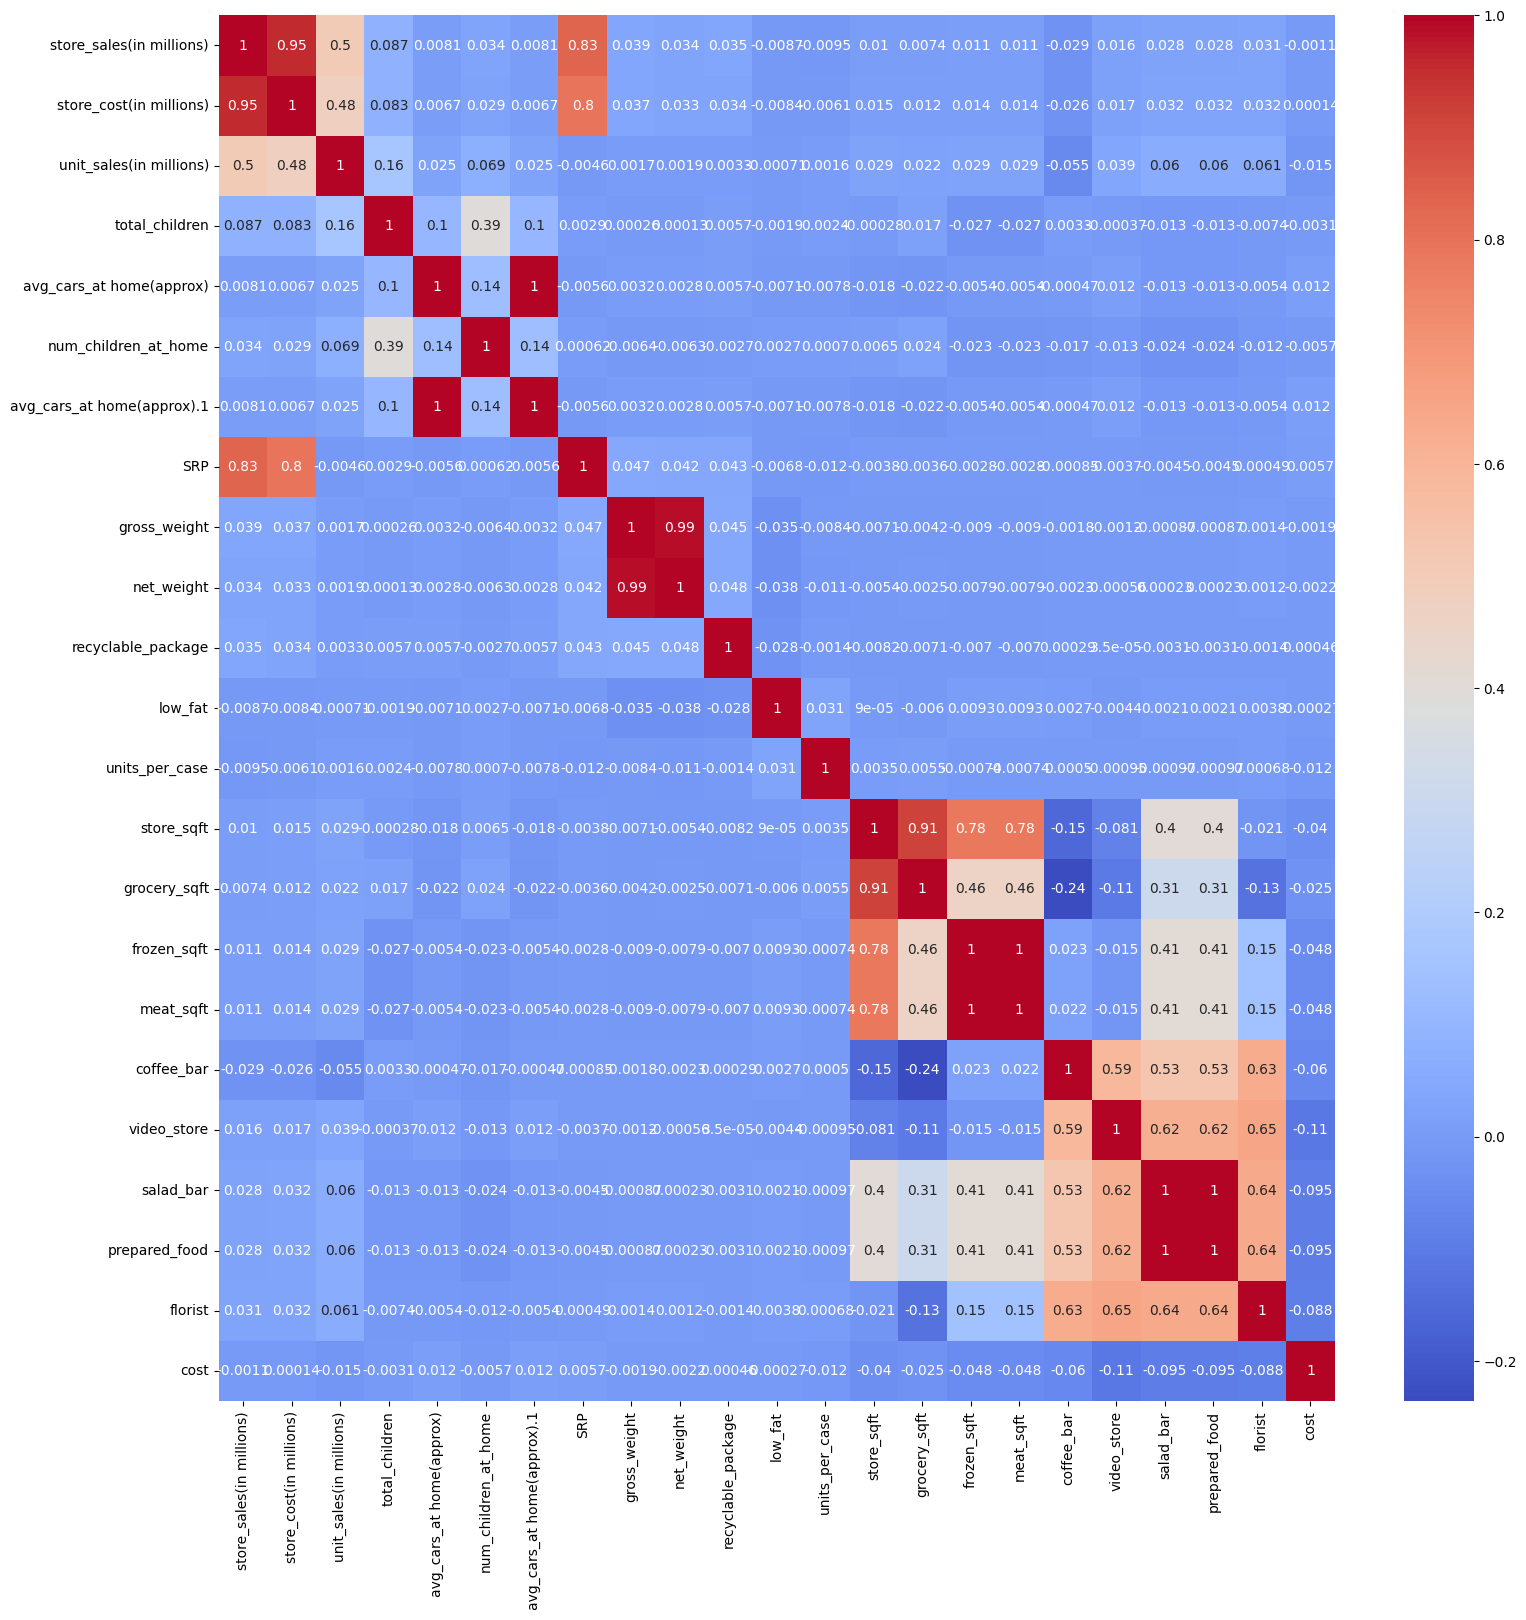

In [18]:
plt.figure(figsize = (18,18))
sns.heatmap(df_foodmart.corr(),annot=True,cmap='coolwarm')
plt.show()

observations:
1. Features with correlation 1 
   a. prepared_food and salad_bar
   b. meat_sqft and frozen_sqft
2. correlation 0.99 - net_weight and gross_weight
3. correlation 0.95 - store_sales and store_cost
4. correlation 0.91 - grocery_sqft and store_sqft


In [19]:
df_foodmart.corrwith(df_foodmart['cost'])

store_sales(in millions)     -0.001083
store_cost(in millions)       0.000141
unit_sales(in millions)      -0.014640
total_children               -0.003149
avg_cars_at home(approx)      0.012444
num_children_at_home         -0.005734
avg_cars_at home(approx).1    0.012444
SRP                           0.005738
gross_weight                 -0.001853
net_weight                   -0.002197
recyclable_package            0.000465
low_fat                      -0.000265
units_per_case               -0.011585
store_sqft                   -0.040066
grocery_sqft                 -0.025498
frozen_sqft                  -0.048262
meat_sqft                    -0.048254
coffee_bar                   -0.060282
video_store                  -0.110196
salad_bar                    -0.094774
prepared_food                -0.094774
florist                      -0.087703
cost                          1.000000
dtype: float64

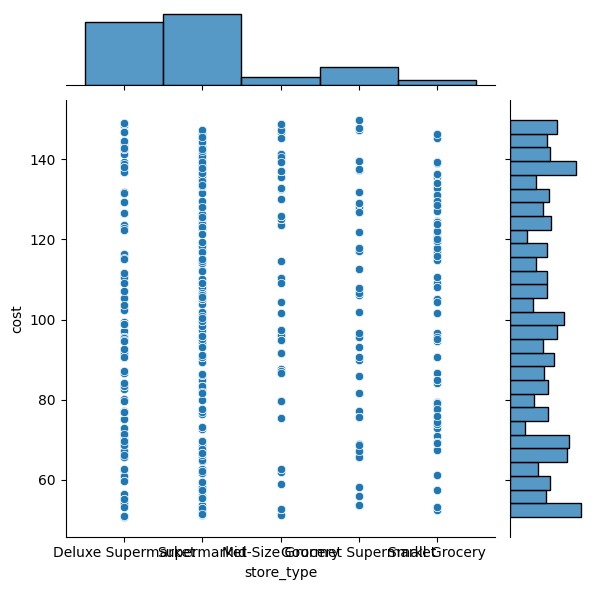

In [20]:
sns.jointplot(x='store_type',y='cost',data=df_foodmart)

<AxesSubplot: xlabel='store_sales(in millions)', ylabel='Count'>

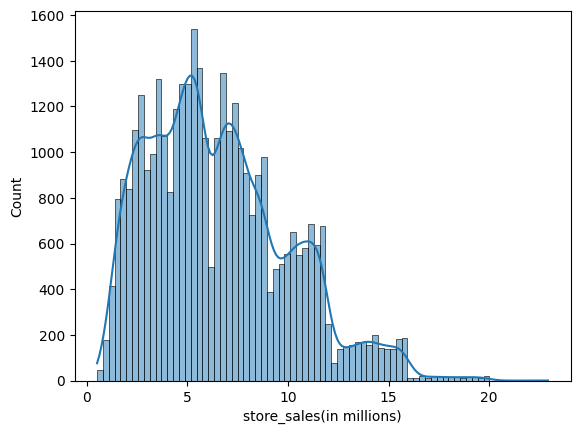

In [21]:
sns.histplot(df_foodmart['store_sales(in millions)'], kde=True)

store_sales(in millions) have outliners. data do not have  normal distribution.

<AxesSubplot: xlabel='store_cost(in millions)', ylabel='Count'>

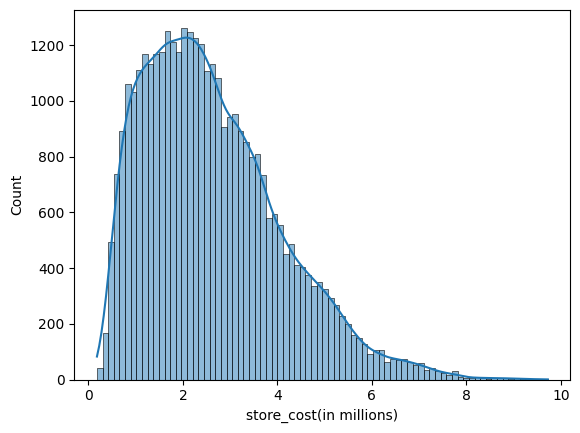

In [22]:
sns.histplot(df_foodmart['store_cost(in millions)'], kde=True)

store_cost (in millions) have outliners. data do not have  normal distribution.

<AxesSubplot: xlabel='unit_sales(in millions)', ylabel='Count'>

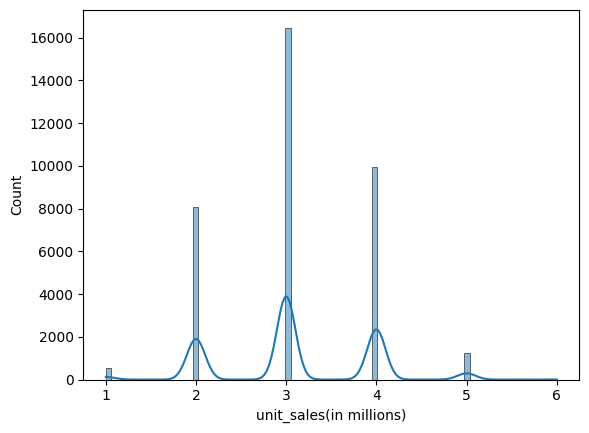

In [23]:
sns.histplot(df_foodmart['unit_sales(in millions)'], kde=True)

unit sales data is almost good distribution. outliners can be ignored.

Detecting and handling outliners.
outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot.

In [24]:
# filter the numerical features in the dataset to find the correlation
df_numeric_features = df_foodmart.select_dtypes(include=[np.number])

# print the names of the numeric variables that are not part of the df_numeric_features data frame
df_numeric_features.columns

Index(['store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'total_children', 'avg_cars_at home(approx)',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'SRP',
       'gross_weight', 'net_weight', 'recyclable_package', 'low_fat',
       'units_per_case', 'store_sqft', 'grocery_sqft', 'frozen_sqft',
       'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food',
       'florist', 'cost'],
      dtype='object')

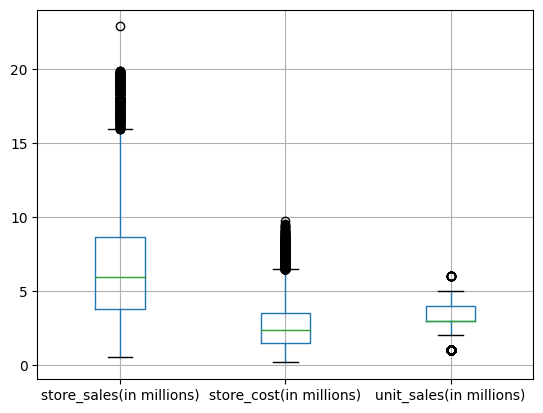

In [25]:
# create a boxplot for all numeric features
df_numeric_features.boxplot(column=['store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)'])

# display the plot without any additional text
plt.show()

<AxesSubplot: xlabel='store_sales(in millions)'>

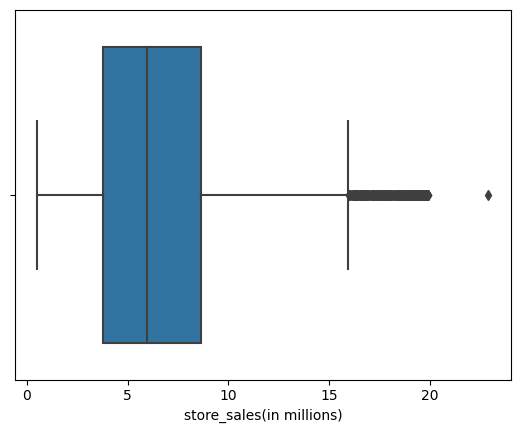

In [26]:
sns.boxplot(x=df_foodmart['store_sales(in millions)'])

In [27]:
Q1 = df_foodmart.quantile(0.25)
Q3 = df_foodmart.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

store_sales(in millions)         4.8700
store_cost(in millions)          1.9854
unit_sales(in millions)          1.0000
total_children                   3.0000
avg_cars_at home(approx)         2.0000
num_children_at_home             1.0000
avg_cars_at home(approx).1       2.0000
SRP                              1.3700
gross_weight                     8.0000
net_weight                       8.0900
recyclable_package               1.0000
low_fat                          1.0000
units_per_case                  18.0000
store_sqft                    7204.0000
grocery_sqft                  5891.0000
frozen_sqft                   1005.0000
meat_sqft                      670.0000
coffee_bar                       1.0000
video_store                      1.0000
salad_bar                        1.0000
prepared_food                    1.0000
florist                          1.0000
cost                            56.9700
dtype: float64


In [28]:
df_foodmart = df_foodmart[~((df_foodmart < (Q1 - 1.5 * IQR)) |(df_foodmart > (Q3 + 1.5 * IQR))).any(axis=1)]
df_foodmart.shape

(25112, 40)

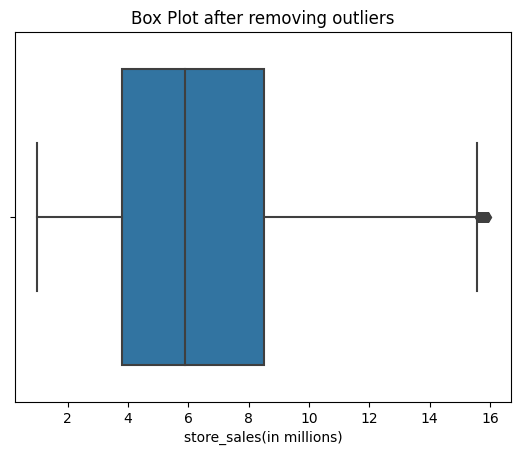

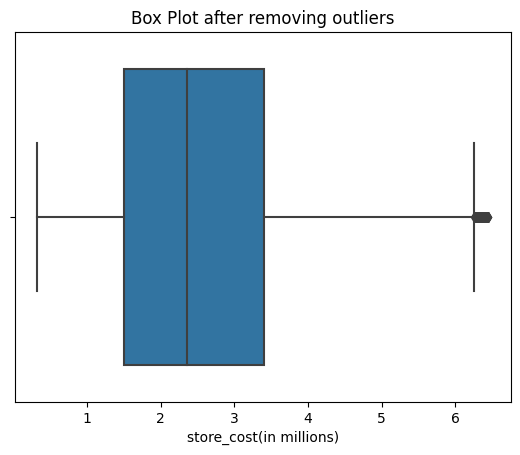

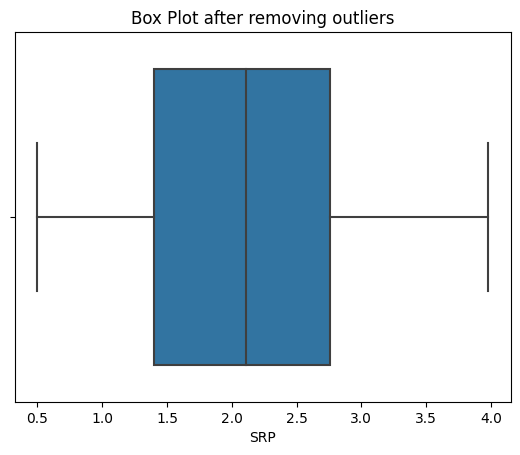

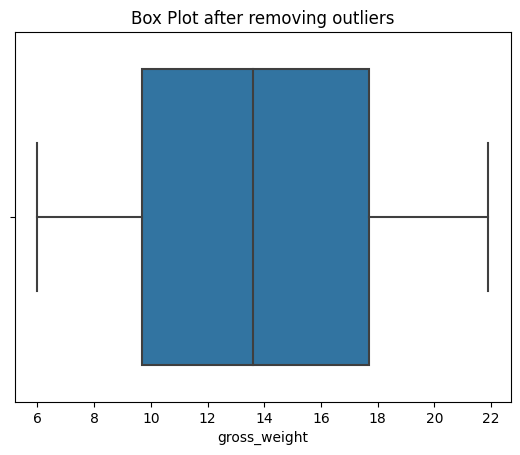

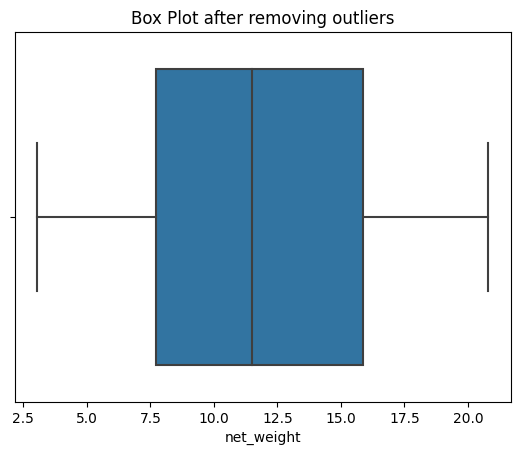

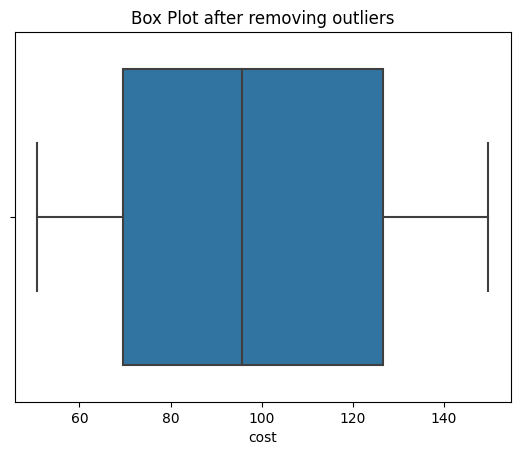

In [29]:
for col in df_foodmart.select_dtypes('float64','int64').columns:
    sns.boxplot(x=df_foodmart[col])
    plt.title("Box Plot after removing outliers")
    plt.show()

visualisation of each categorical columns to check their variation with target variable cost.

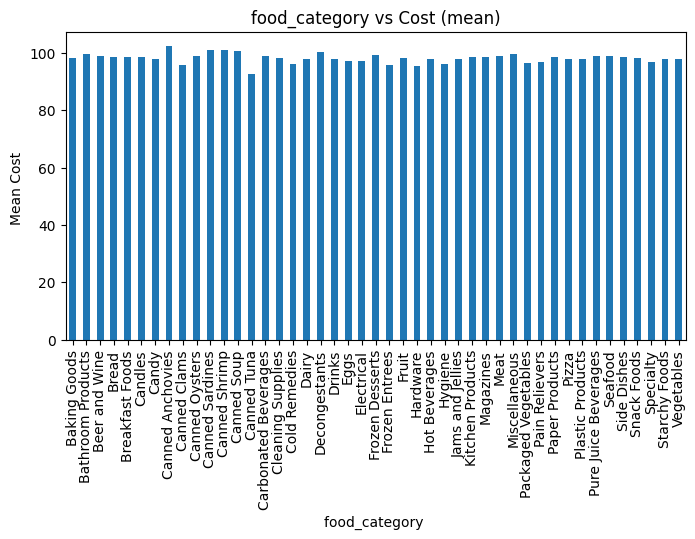

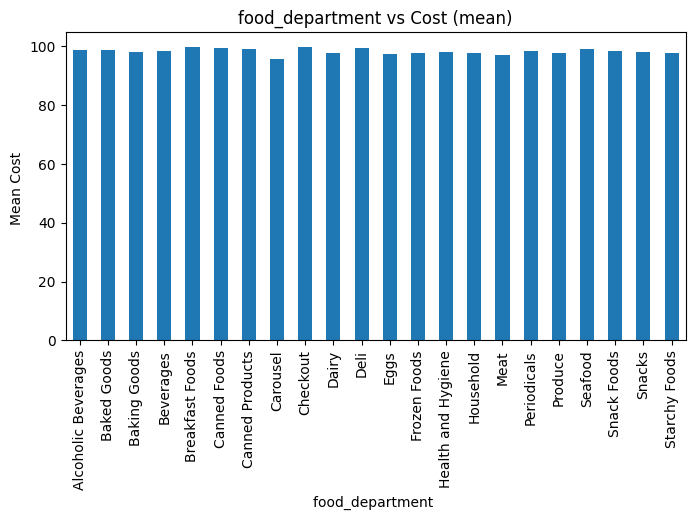

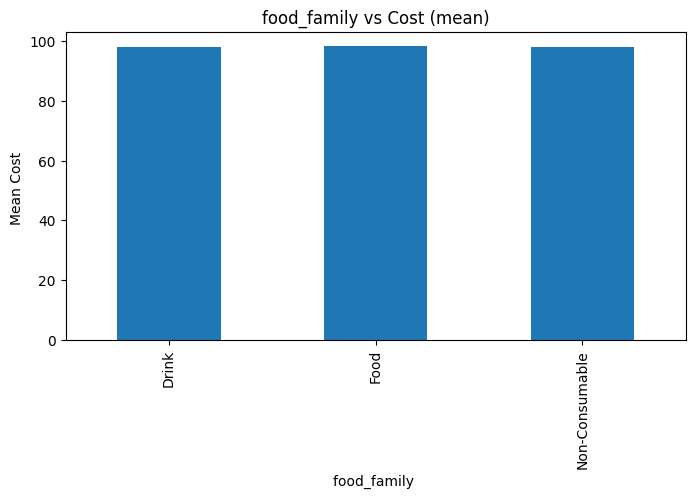

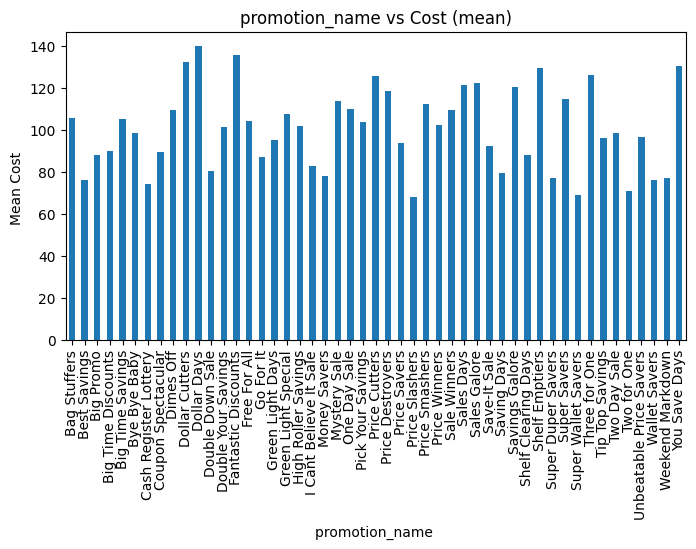

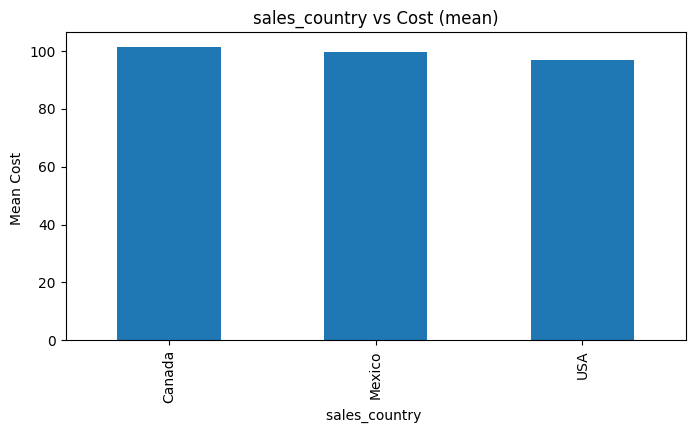

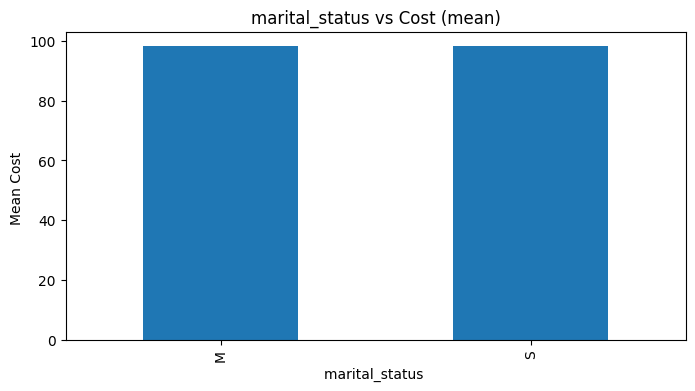

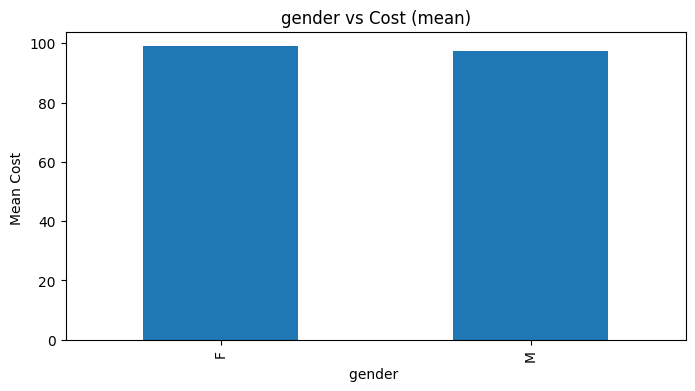

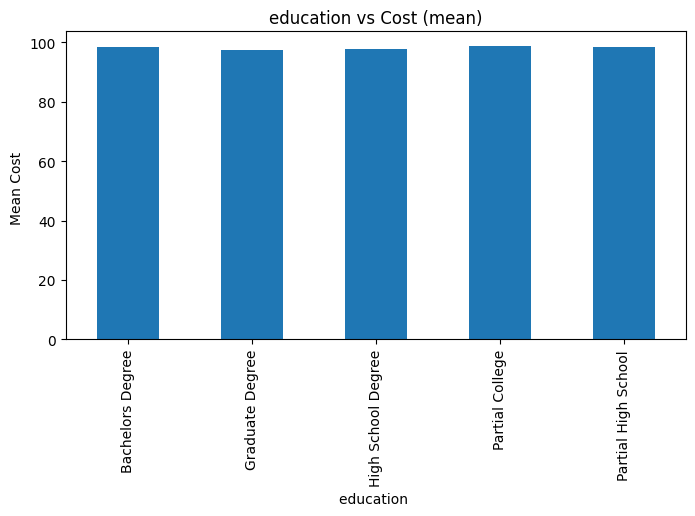

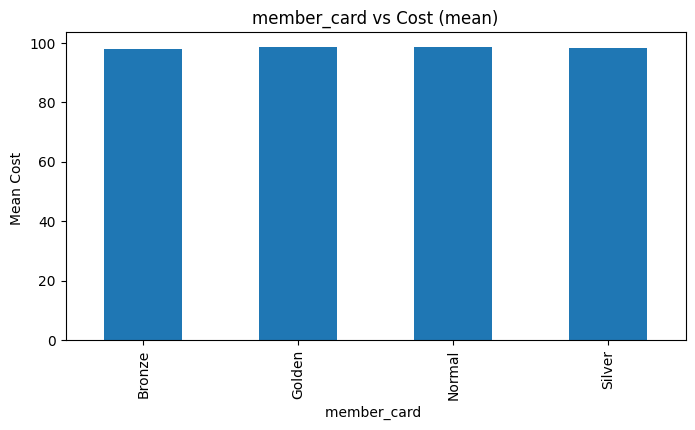

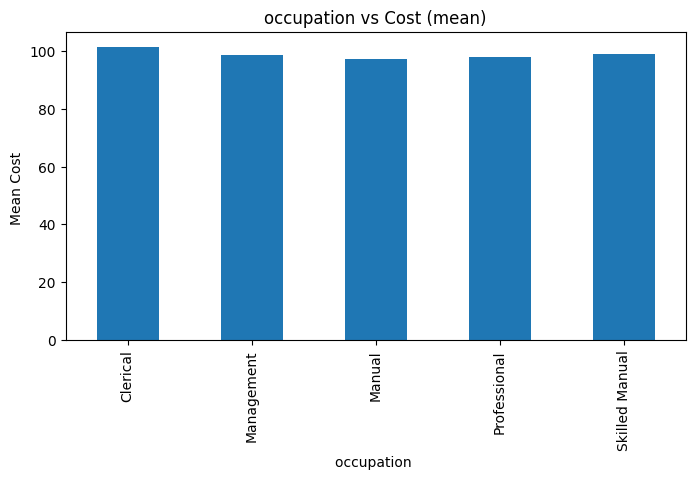

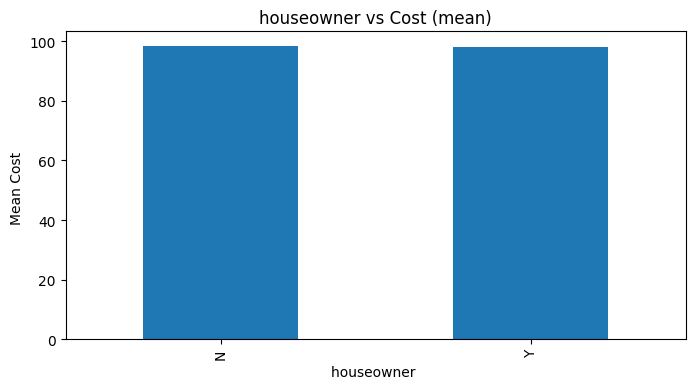

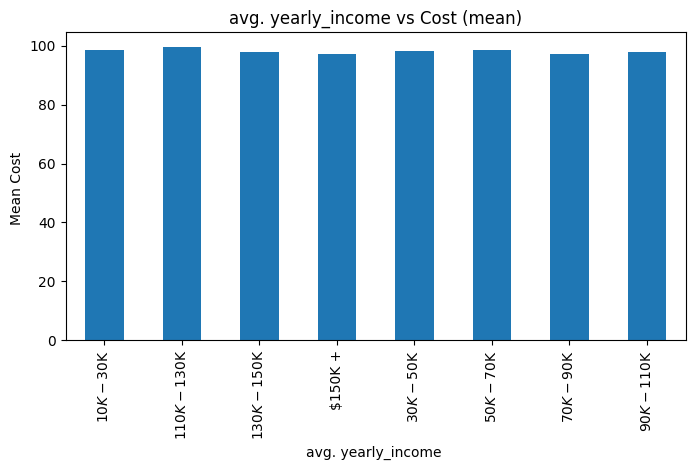

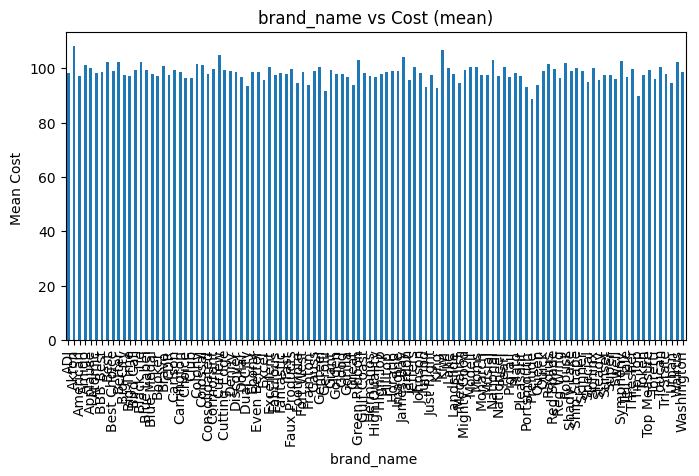

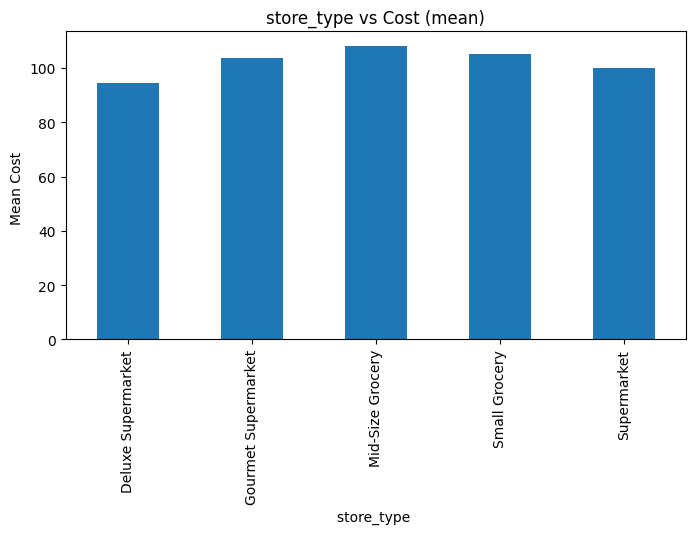

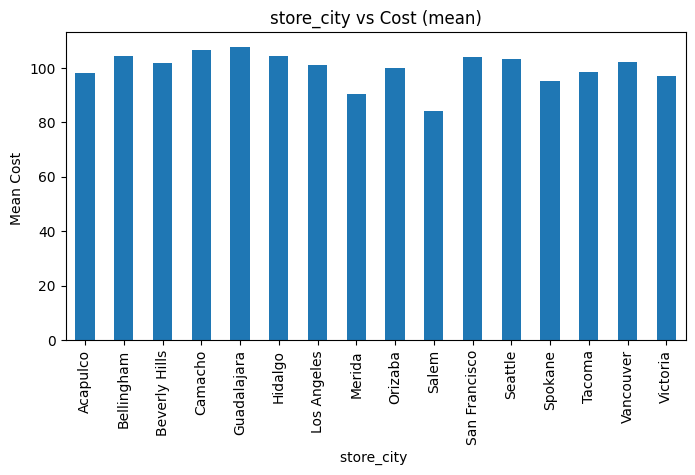

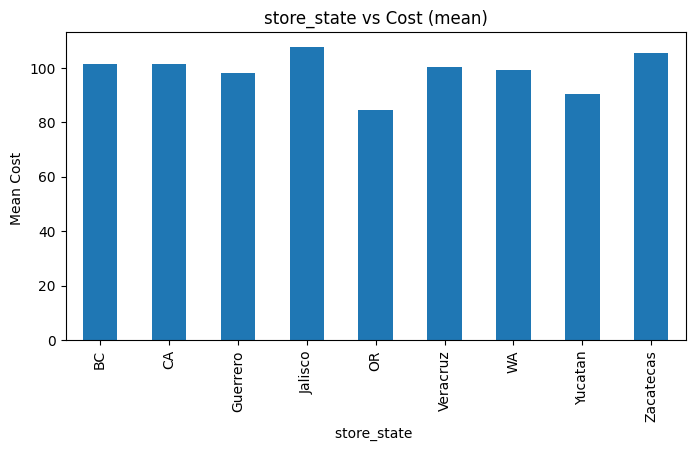

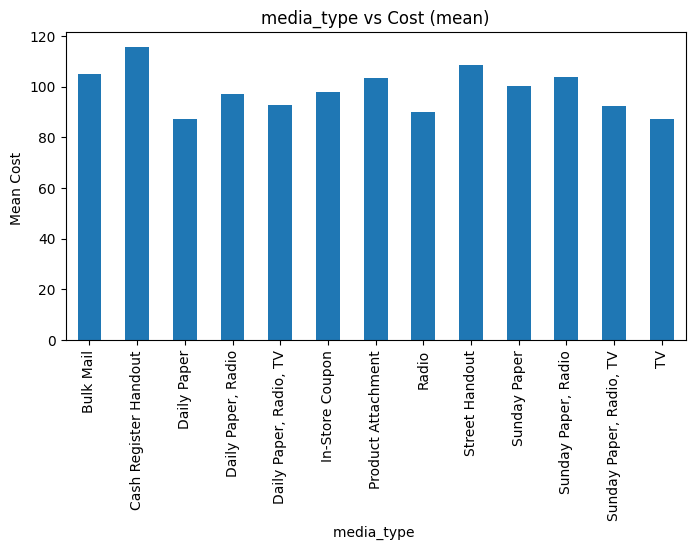

In [30]:
for col in df_foodmart.select_dtypes('object').columns:
    group= df_foodmart.groupby(col)["cost"].mean()
    #create bar plot by group
    group.plot(kind='bar', figsize=(8,4))
    plt.xlabel(col+" ")
    plt.ylabel("Mean Cost ")
    plt.title( col+" vs Cost (mean)")
    plt.show()

Infreences from bargraph:
1. Product type such as food_category, food_department, food_family do not effect much on campain cost. As the varation in cost is very small with variation in product type.
2. Visualiasing  promotion vs cost graph we can see that promotions significantly affect the cost of campaigns.Some promotions have a much higher cost than others.
3. customer details: marital_status, gender,education, member_card,houseowner are almost evenly distibuted to campaign cost.
4. store details: store sales, store type, city, state effects the variation in cost.

In [31]:
import scipy.stats as stats

categorical_features = df_foodmart.select_dtypes(include='object').columns
for feature in categorical_features:
    groups = []
    for value in df_foodmart[feature].unique():
        groups.append(df_foodmart[df_foodmart[feature] == value]['cost'])
    f, p = stats.f_oneway(*groups)
    print(f"Feature: {feature} \nF-value: {f} \nP-value: {p} \n")

Feature: food_category 
F-value: 0.6588363126652595 
P-value: 0.9604212109473865 

Feature: food_department 
F-value: 0.5121877998549421 
P-value: 0.9672998983372636 

Feature: food_family 
F-value: 0.12196268101470899 
P-value: 0.8851819263466799 

Feature: promotion_name 
F-value: 285.6050829399117 
P-value: 0.0 

Feature: sales_country 
F-value: 31.58836415374887 
P-value: 1.9887381440231546e-14 

Feature: marital_status 
F-value: 0.008351787087924663 
P-value: 0.927184936136369 

Feature: gender 
F-value: 16.756555671392636 
P-value: 4.262802774857533e-05 

Feature: education 
F-value: 0.9315378025403527 
P-value: 0.4443523278366315 

Feature: member_card 
F-value: 0.745095685204762 
P-value: 0.5250421318282026 

Feature: occupation 
F-value: 4.805040061109736 
P-value: 0.0007135256439077149 

Feature: houseowner 
F-value: 0.1979474844942721 
P-value: 0.6563865380899752 

Feature: avg. yearly_income 
F-value: 1.2685520582690106 
P-value: 0.26144738158468184 

Feature: brand_name 
F

In [32]:
#dropping column
df = df_foodmart.copy()
df.drop(['food_category', 'food_department', 'food_family','sales_country','marital_status', 'gender','education', 'member_card','houseowner',
         'avg. yearly_income','brand_name','occupation','recyclable_package', 'low_fat'],axis=1,inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25112 entries, 0 to 36254
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   store_sales(in millions)    25112 non-null  float64
 1   store_cost(in millions)     25112 non-null  float64
 2   unit_sales(in millions)     25112 non-null  int64  
 3   promotion_name              25112 non-null  object 
 4   total_children              25112 non-null  int64  
 5   avg_cars_at home(approx)    25112 non-null  int64  
 6   num_children_at_home        25112 non-null  int64  
 7   avg_cars_at home(approx).1  25112 non-null  int64  
 8   SRP                         25112 non-null  float64
 9   gross_weight                25112 non-null  float64
 10  net_weight                  25112 non-null  float64
 11  units_per_case              25112 non-null  int64  
 12  store_type                  25112 non-null  object 
 13  store_city                  251

Encoding the categorical data using Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

def encodeCategorialValues(df):
    global column_val
    catagorial_col = list(df.select_dtypes(include=[np.object]))
    for col in catagorial_col:
        unique_val = len(df[col].unique())
        value = np.sort(df[col].unique())
        column_val[col] = list(value)
        lst = list(value)
        test_dict = dict()
        for i in value:
            test_dict[i] = lst.index(i)
        df[col] = df[col].map(test_dict)
    return df
column_val = dict()
encodeCategorialValues(df)

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,4.35,1.3485,3,11,2,2,1,2,1.45,9.65,...,16418,4016,2678,1,1,1,1,1,1,142.71
1,5.58,1.8414,3,36,4,2,0,2,1.86,18.40,...,13305,4746,3164,1,0,0,0,0,7,99.77
2,5.10,2.1420,3,43,2,2,0,2,1.70,11.20,...,20141,6393,4262,1,1,1,1,1,6,76.88
3,4.20,2.0580,3,6,2,1,0,1,1.40,17.90,...,18670,5415,3610,1,1,1,1,1,4,55.59
4,10.35,3.5190,3,22,5,3,0,3,3.45,18.60,...,30351,4819,3213,0,0,0,0,0,8,146.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36248,6.10,1.9520,5,27,3,4,0,4,1.22,21.40,...,13305,4746,3164,1,0,0,0,0,11,100.44
36249,9.57,3.0624,3,16,2,0,0,0,3.19,17.50,...,16844,4149,2766,1,0,1,1,1,2,75.76
36250,8.73,3.6666,3,29,3,3,0,3,2.91,9.51,...,22123,7041,4694,1,0,1,1,1,5,94.63
36252,5.55,1.8870,3,1,4,2,0,2,1.85,16.40,...,15337,5011,3340,1,1,1,1,1,4,53.82


Data Preparation for model building

In [34]:
Y = df["cost"]
X = df.drop(columns='cost')

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)


Shape of training feature: (20089, 25)
Shape of testing feature: (5023, 25)


 Standardize the data, so that the values are within a particular range

In [36]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(df.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.MinMaxScaler()
scaled=scaler.fit_transform(df.to_numpy())
scaled= pd.DataFrame(scaled,columns=list(df.columns.values))
scaled.head(2)

,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,0.224080,0.167205,0.333333,0.229167,0.4,0.5,0.5,0.5,0.272989,0.229560,...,0.182623,0.130747,0.131034,1.0,1.0,1.0,1.0,1.0,0.083333,0.928860
1,0.306355,0.247650,0.333333,0.750000,0.8,0.5,0.0,0.5,0.390805,0.779874,...,0.000000,0.340517,0.340517,1.0,0.0,0.0,0.0,0.0,0.583333,0.494947


Model training, and testing:


base model: linear regression

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
print('Attempting to fit Linear Regressor')

Attempting to fit Linear Regressor


In [38]:
from sklearn import  metrics
y_pred_val_lr = lr.predict(X_test)
print('MAE on Validation set :',metrics.mean_absolute_error(Y_test, y_pred_val_lr))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(Y_test, y_pred_val_lr))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(Y_test, y_pred_val_lr)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(Y_test, y_pred_val_lr))
print("\n")

MAE on Validation set : 25.04595659041828


MSE on Validation set : 857.8914384093781


RMSE on Validation set : 5.004593548972612


R2 Score on Validation set : 0.02594784923372706




Write a function to fit and print the model predictions, input parameters would be model, train, and test data

In [39]:

regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    RandomForestRegressor(),
]


Main reason why we are executing so many models together is to find which machine learning model works best for this particular dataset.

In [40]:
head = 10
for model in regressors[:head]:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
     
    print(model)
    
    print('\tMSE on Validation set :',mean_squared_error(Y_test, y_pred))
    print('\tRMSE on Validation set :',(mean_absolute_error(Y_test, y_pred)))
    print("\tMean absolute error:", mean_absolute_error(Y_test, y_pred))
    print("\tR2 score:", r2_score(Y_test, y_pred))
    print()

KNeighborsRegressor()
	MSE on Validation set : 334.54970338522793
	RMSE on Validation set : 11.333409516225363
	Mean absolute error: 11.333409516225363
	R2 score: 0.620151404325942

GradientBoostingRegressor()
	MSE on Validation set : 320.55338916423034
	RMSE on Validation set : 14.379651748729104
	Mean absolute error: 14.379651748729104
	R2 score: 0.6360428555741798

ExtraTreesRegressor()
	MSE on Validation set : 2.9647502632371077
	RMSE on Validation set : 0.21639737208853588
	Mean absolute error: 0.21639737208853588
	R2 score: 0.9966338149081598

DecisionTreeRegressor()
	MSE on Validation set : 6.022989966155684
	RMSE on Validation set : 0.17446147720497965
	Mean absolute error: 0.17446147720497965
	R2 score: 0.9931614816654948

LinearRegression()
	MSE on Validation set : 857.8914384093781
	RMSE on Validation set : 25.04595659041828
	Mean absolute error: 25.04595659041828
	R2 score: 0.02594784923372706

Lasso()
	MSE on Validation set : 870.1791771904111
	RMSE on Validation set : 25.

By comparing these results, we can infere that DecisionTreeRegressor(),RandomForestRegressor() and ExtraTreesRegressor are best models to explore further.

Assuming that RandomForestRegressor() is the best model, now we can look doing hyper parameter tuning on it. This approach saves time as compared going one by one and exploring each mode.

Hyperparameter tuning of RandomForestRegressor() using GridSearchCV approach

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
model = RandomForestRegressor()
param_rf = { "bootstrap": [True, False], 'n_estimators':[100,300],
            'max_depth':[10,20]}
rf_hyper_model= GridSearchCV(model, param_rf, cv=3, n_jobs= -1, verbose=1)
rf_hyper_model.fit(X_train, Y_train)

print("Best Score:\n", rf_hyper_model.best_score_)
print("Best Hyper Parameters:\n", rf_hyper_model.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Score:
 0.9960078538363581
Best Hyper Parameters:
 {'bootstrap': True, 'max_depth': 20, 'n_estimators': 100}


build pipeline

In [53]:
# importing required libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline
from imblearn import FunctionSampler

from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import FunctionTransformer
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import f_regression,SelectFromModel,SequentialFeatureSelector,SelectKBest
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [54]:
# read the training data set
data_pipe = pd.read_csv("C:\\Users\\ANKITA SHARMA\\Desktop\\capstone\\Train.csv")
data_pipe.shape




(36256, 41)

In [55]:
# seperate the independent and target variables
X = df.drop(columns='cost')
y = df["cost"]

y = pd.DataFrame(y)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
def process_outlier():
    col_names = ['store_sales(in millions)','store_cost(in millions)']
    for col_name in col_names:
        q1= df[col_name].quantile(0.25)
        q3= df[col_name].quantile(0.75)
        iqr= q3-q1
        Lower_tail=q1-1.5*iqr
        Upper_tail=q3+1.5*iqr
        for i in range(0,len(df[col_name])):
            if df[col_name][i] > Upper_tail or df[col_name][i] < Lower_tail:
                df[col_name] = df[col_name].replace(df[col_name][i],np.median(df[col_name]))
    
    return df

In [81]:

# Create a pipeline with preprocessing and random forest regression
pipeline = Pipeline([ ('skb', SelectKBest(k = 10)),
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])

In [79]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)



Pipeline(steps=[('skb', SelectKBest()), ('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor())])

In [80]:
# Make predictions on the testing set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

print('\tMSE on Validation set :',mean_squared_error(y_test, y_pred))
print('\tRMSE on Validation set :',(mean_absolute_error(y_test, y_pred)))
print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
print("\tR2 score:", r2_score(y_test, y_pred))

	MSE on Validation set : 3.100518071759286
	RMSE on Validation set : 0.17107924447113396
	Mean absolute error: 0.17107924447113396
	R2 score: 0.996479663788362
